In [360]:
import pandas as pd 
import numpy as np 
from sqlalchemy import create_engine
import mysql.connector


In [706]:
try:
    connection = mysql.connector.connect(host='localhost',
                                             database='project1',
                                             user='root',
                                             password='MosiSQL$$')
    #allPlayersFeature
    cursor = connection.cursor()
    cursor.execute('select * from playersfeature')
    record = cursor.fetchall()
    df=pd.DataFrame(record ,columns=[i[0] for i in cursor.description])

    #allPlayersTransfer
    cursor = connection.cursor()
    cursor.execute('select * from transfer')
    record = cursor.fetchall()
    dfTransfer = pd.DataFrame(record , columns=[i[0] for i in cursor.description])
    
except mysql.connector.Error as error:
    print("Failed to get record from database: {}".format(error))

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        df =df.drop(columns='id')
        dfTransfer = dfTransfer.drop(columns = 'id')
        # print("MySQL connection is closed")


In [707]:
# df= pd.read_parquet('./allPlayersFeature (1).parquet')
# df=df.drop_duplicates()
df1 = df.dropna()
deletedPosition = ['LIAN Sports Group','LB SPORT & ...','2SAgency','Gelu Rodríguez','SPOCS Global Sports','ROGON','FIRST'\
   'Playeleven', 'Wasserman','Unique Sports Group','SMI Sports ...','CAA Stellar','GG11','InterStarDeporte','YOU FIRST','SEG'\
      'Playeleven','FIRST'] 
df1 = df1.drop(df1[df1['position'].isin(deletedPosition)].index)

In [ ]:
len(df1)
dfML = df1[['playersId','age','height','position','currentValue','squad','appearances','ppg','goals',\
    'assists','ownGoal','subsituationsOn','subsituationsOff','yellowCards','secondYellowCards'\
        ,'redCards','penalyGoals','minutesPerGoal','minutesPlayed','goalsConceded','cleanSheets']]

def changeSquad(x):
    if str(x)=='-':
        return 0
    else: return np.int64(x)
dfML['squad'] = dfML['squad'].apply(lambda x: changeSquad(x))

def changeAppearances(x):
    if str(x)=='-':
        return 0
    else : return np.int64(x)
dfML['appearances'] = dfML['appearances'].apply(lambda x: changeAppearances(x))


def changePPG(x):
    if str(x)=='-' or str(x)=='0,00':
        return 0
    else : return  np.float64(x)
dfML['ppg'] = dfML['ppg'].apply(lambda x: changePPG(x))


def changeGoals(x):
    if str(x)=='-' or str(x)=='0,00':
        return 0
    else : return  np.float64(x)
dfML['goals'] = dfML['goals'].apply(lambda x: changeGoals(x))


def changeAssists(x):
    if str(x)=='-' or str(x)=='goalKeeper' :
        return 0
    else : return  np.float64(x)
dfML['assists'] = dfML['assists'].apply(lambda x: changeAssists(x))



def changeOwngoal(x):
    if str(x)=='-' :
        return 0
    else : return  np.float64(x)
dfML['ownGoal'] = dfML['ownGoal'].apply(lambda x: changeAssists(x))


def changeSubsituationsOn(x):
    if str(x)=='-' :
        return 0
    else : return  np.float64(x)
dfML['subsituationsOn'] = dfML['subsituationsOn'].apply(lambda x: changeSubsituationsOn(x))


def changeSubsituationsOff(x):
    try:
        return np.float64(x)
    except:
        return 0 
dfML['subsituationsOff'] = dfML['subsituationsOff'].apply(lambda x: changeSubsituationsOff(x))


def changeYellowCards(x):
    try:
        return np.float64(x)
    except:
        return 0 
dfML['yellowCards'] = dfML['yellowCards'].apply(lambda x: changeYellowCards(x))


#'secondYellowCards', 'redCards',
    #    'penalyGoals', 'minutesPerGoal', 'minutesPlayed', 'goalsConceded',
    #    'cleanSheets']

def changeAll(x):
    try:
        return np.float64(x)
    except:
        return 0 
dfML['secondYellowCards'] = dfML['secondYellowCards'].apply(lambda x: changeAll(x))

def changeMinute(x):
    try:
        return np.float64(str(x).replace("'","").replace('.',''))
    except:
        return 0 
dfML['redCards'] = dfML['redCards'].apply(lambda x: changeAll(x))
dfML['penalyGoals'] = dfML['penalyGoals'].apply(lambda x: changeAll(x))
dfML['minutesPerGoal'] = dfML['minutesPerGoal'].apply(lambda x: changeMinute(x))
dfML['minutesPlayed'] = dfML['minutesPlayed'].apply(lambda x: changeMinute(x))
dfML['goalsConceded'] = dfML['goalsConceded'].apply(lambda x: changeAll(x))
dfML['cleanSheets'] = dfML['cleanSheets'].apply(lambda x: changeAll(x))




In [709]:
from sklearn.preprocessing import OrdinalEncoder
deletedPosition = ['LIAN Sports Group','LB SPORT & ...','2SAgency','Gelu Rodríguez','SPOCS Global Sports','ROGON','FIRST'\
   'Playeleven', 'Wasserman','Unique Sports Group','SMI Sports ...','CAA Stellar','GG11','InterStarDeporte','YOU FIRST','SEG'\
      'Playeleven','FIRST'] 
# dfML['minutesPerGoal'].value_counts()
# dfML['minutesPlayed'].isnull().sum()
# finalDF['minutesPerGoal']
dfML['position'].value_counts()
dfML = dfML.drop(labels = dfML[dfML['position'].isin(['Playeleven','SEG'])].index)
dfML['position'].value_counts()
# df1[df1['playersId']=='FIRST']
# positionOneHot = pd.get_dummies(dfML, columns = ['position'])
# print(positionOneHot)
enc = OrdinalEncoder()
# dfML[['position']] = enc.fit_transform(dfML[['position']])
dfML['position'].value_counts()


Centre-Back           35911
Centre-Forward        30301
Central Midfield      27522
Goalkeeper            23161
Defensive Midfield    16867
Right-Back            15370
Left-Back             14272
Right Winger          13691
Attacking Midfield    13094
Left Winger           12996
Second Striker         1838
Right Midfield         1557
Left Midfield          1344
Attack                   65
midfield                 27
Name: position, dtype: int64

In [710]:
dfML['position'].value_counts()
print(dfML.position.value_counts())
def labeling(x):
    if('Midfield' in str(x)):
        return 'Midfield'
    elif ('Winger' in str(x)):
        return 'Winger'
    elif ('Back' in str(x)):
        return 'Back'
    elif ('Striker' in str(x)):
        return 'Winger'
    elif ('Attack' in str(x)):
        return 'Winger'
    elif ('midfield' in str(x)):
        return 'Midfield'
    else:
        return x
    
dfML['position'] = dfML['position'].apply(lambda x: labeling(x))
print(dfML.position.value_counts())

Centre-Back           35911
Centre-Forward        30301
Central Midfield      27522
Goalkeeper            23161
Defensive Midfield    16867
Right-Back            15370
Left-Back             14272
Right Winger          13691
Attacking Midfield    13094
Left Winger           12996
Second Striker         1838
Right Midfield         1557
Left Midfield          1344
Attack                   65
midfield                 27
Name: position, dtype: int64
Back              65553
Midfield          60411
Centre-Forward    30301
Winger            28590
Goalkeeper        23161
Name: position, dtype: int64


In [711]:
finalDf = pd.DataFrame(dfML.groupby('playersId').sum())
finalDf=finalDf.reset_index()
def changeValue(x):
    if x!=np.nan and x!=None:
        if('k' in str(x)):
            try:
                return np.float64(str(x).replace('k','').replace('€',''))/1000
            except:
                #â‚¬400k
                return(0.4)
        else :
            try:
                return np.float64(str(x).replace('m','').replace('€',''))
            except:
                #â‚¬400k
                return 0.4
    else :
        return np.nan
def changeHeight(x):
    try:
        return np.float64(str(x).replace(',','.').replace('m',''))
    except:
        return 0
def changeAge(x):
    try:
        return np.int64(x)
    except:
        return 0


dfML['height'] = dfML['height'].apply(lambda x : changeHeight(x))
dfML['age'] = dfML['age'].apply(lambda x : changeAge(x))
height = pd.DataFrame(dfML.groupby('playersId')['height'].agg(['unique'])).reset_index()
age = pd.DataFrame(dfML.groupby('playersId')['age'].agg(['unique'])).reset_index()
position = pd.DataFrame(dfML.groupby('playersId')['position'].agg(['unique'])).reset_index()
position['position'] = position['unique'].apply(lambda x : x[0])
height['height'] = height['unique'].apply(lambda x : x[0])
age['age'] = age['unique'].apply(lambda x : x[0])
dfML['currentValue']=dfML['currentValue'].apply(lambda x : changeValue(x))
value = pd.DataFrame(dfML.groupby('playersId')['currentValue'].agg(['unique'])).reset_index()
value['marketValue']=value['unique'].apply(lambda x : x[0])


finalDf = pd.merge(finalDf,value ,on='playersId').drop(columns=['unique'])
finalDf = pd.merge(finalDf,height ,on='playersId').drop(columns=['unique'])
finalDf = pd.merge(finalDf,age  ,on='playersId').drop(columns=['unique'])
finalDf = pd.merge(finalDf,position  ,on='playersId').drop(columns=['unique'])
finalDf = pd.get_dummies(finalDf, columns = ['position'])
# finalDf


# finalDF
# finalDF.isnull().sum()
# finalDF['minutesPlayed'].value_counts()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# finalDf.to_parquet('cleanedFeatures.parquet',engine='pyarrow')
# pd.read_parquet('cleanedFeatures.parquet',engine='pyarrow')

In [712]:
dfTransfer = pd.read_parquet('./AllplayersTransferFinal.parquet',engine='pyarrow')
dfTransfer[dfTransfer['playersId']=='108390']
# finalDf[finalDf['playersId']=='108390']
dfTransfer['fee']=dfTransfer['fee'].apply(lambda x : str(x).replace('Loan fee:',''))
dfTransfer['mv']=dfTransfer['mv'].apply(lambda x : str(x).replace('â‚¬',''))
def changePrice(x):
    try:
        if('k' in str(x)):
            try:
                return np.float64(str(x).replace('k','').replace('€',''))/1000
            except:
                return 0
        else :
            try:
                return np.float64(str(x).replace('m','').replace('€',''))
            except:
                
                return 0
    except :
        return 0
dfTransfer['fee'] = dfTransfer['fee'].apply(lambda x: changePrice(x))
dfTransfer['mv'] = dfTransfer['mv'].apply(lambda x: changePrice(x))
t= dfTransfer.groupby('playersId')[['mv','fee']].sum()
t= t.reset_index()
# t[ t['playersId']=='108390']
t['subTransfer'] = t['mv']-t['fee']
finalDf = pd.merge(finalDf,t, on ='playersId')
# finalDf

In [653]:
# finalDf.to_parquet('allDataForML1.parquet',engine='pyarrow')



In [368]:
# not such eyeCatching improvment in using this methods (correlation tuning) for model results so we ignore it
indexList = finalDf.corr()[(finalDf.corr()['marketValue']<0.1) & (finalDf.corr()['marketValue']>-0.1)].index
betterDF = finalDf.drop(indexList.to_list(), axis=1)

In [575]:
# res = finalDf.copy()

In [654]:
# finalDf =res
# finalDf
finalDf

,playersId,squad,appearances,ppg,goals,assists,ownGoal,subsituationsOn,subsituationsOff,yellowCards,...,minutesPlayed,goalsConceded,cleanSheets,marketValue,height,age,position,mv,fee,subTransfer
0,100131,442,421,63.74,24.0,28.0,0.0,65.0,89.0,84.0,...,31621.0,0.0,0.0,16.000,1.87,31,3,25.800,16.00,9.800
1,100497,457,372,61.11,4.0,5.0,1.0,25.0,29.0,69.0,...,30701.0,0.0,0.0,0.275,1.84,35,0,8.975,2.40,6.575
2,100507,319,292,51.40,3.0,26.0,1.0,30.0,52.0,41.0,...,22986.0,0.0,0.0,0.350,1.78,35,0,9.950,0.00,9.950
3,100722,519,455,40.61,81.0,15.0,0.0,110.0,156.0,47.0,...,30610.0,0.0,0.0,0.900,1.80,32,4,5.300,0.30,5.000
4,100986,487,408,103.29,36.0,52.0,3.0,73.0,73.0,60.0,...,29979.0,0.0,0.0,6.500,1.91,31,0,30.300,6.20,24.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,99523,411,263,29.16,0.0,0.0,2.0,1.0,5.0,14.0,...,23554.0,83.0,323.0,0.300,1.90,35,2,4.400,0.00,4.400
7355,99559,427,354,33.82,52.0,21.0,0.0,118.0,158.0,45.0,...,20619.0,0.0,0.0,1.000,1.75,32,4,3.100,0.00,3.100
7356,9967,624,559,73.90,65.0,58.0,0.0,101.0,158.0,141.0,...,39890.0,0.0,0.0,0.200,1.80,37,3,56.300,22.65,33.650
7357,99922,579,420,89.66,25.0,14.0,0.0,52.0,35.0,70.0,...,33728.0,0.0,0.0,4.500,1.84,32,0,31.500,19.75,11.750


In [ ]:
# in this section we can handle outlier to imporve our models
# def remove_outliers(df,columns,n_std):
#     for col in columns:
#         print('Working on column: {}'.format(col))
        
#         mean = df[col].mean()
#         sd = df[col].std()
        
#         df = df[(df[col] <= mean+(n_std*sd))]
#         print('Job done on column: {}'.format(col))
        
#     return df
# finalDf  = remove_outliers(finalDf.drop(columns='playersId'),finalDf.drop(columns='playersId').columns.tolist(),3)
# finalDf.columns =finalDf.columns.astype(str)
# finalDf

In [714]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        print('Job done on column: {}'.format(col))
        
    return df
finalDf  = remove_outliers(finalDf.drop(columns='playersId'),['marketValue'],3)
finalDf.columns =finalDf.columns.astype(str)


Working on column: marketValue
Job done on column: marketValue


In [715]:
#Feature selection using mutual information and chi2   
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile ,mutual_info_classif,f_regression
data= finalDf.drop(columns='marketValue')
# feature scaling
scaler = MinMaxScaler()
standard = StandardScaler()
scaled = standard.fit_transform(data)
# feature selection
# selector = SelectKBest(chi2, k=20)
selector = SelectPercentile(f_regression, percentile=90)

selected = selector.fit_transform(scaled,finalDf['marketValue'])

print('Number of features before selection:', data.shape[1])
print('Number of features after selection:', selected.shape[1])
data = pd.DataFrame(selected)


Number of features before selection: 26
Number of features after selection: 23


In [723]:
#buildML model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# poly_transformer = PolynomialFeatures(None) # To-Do
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


poly_transformer = PolynomialFeatures(degree=2, include_bias=True)
x_train, x_test, y_train, y_test = train_test_split(data, finalDf['marketValue'], train_size=.80, random_state=42)


x_train_trans = poly_transformer.fit_transform(x_train)
x_test_trans = poly_transformer.transform(x_test)

modelReg = LinearRegression()
modelReg.fit(x_train_trans, y_train)
y_pred = modelReg.predict(x_test_trans)
print('r2_score : ',r2_score(y_test, y_pred))


r2_score :  0.3853793502027474


In [724]:
from flaml import AutoML
automl = AutoML()
automl.fit(x_train, y_train, task='regression')

[flaml.automl: 05-31 03:48:26] {2599} INFO - task = regression
[flaml.automl: 05-31 03:48:26] {2601} INFO - Data split method: uniform
[flaml.automl: 05-31 03:48:26] {2604} INFO - Evaluation method: holdout
[flaml.automl: 05-31 03:48:26] {2726} INFO - Minimizing error metric: 1-r2
[flaml.automl: 05-31 03:48:26] {2776} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl: 05-31 03:48:26] {2870} INFO - List of ML learners in AutoML Run: ['xgboost', 'lgbm', 'rf', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 05-31 03:48:26] {3166} INFO - iteration 0, current learner xgboost
[flaml.automl: 05-31 03:49:30] {3296} INFO - Estimated sufficient time budget=632414s. Estimated necessary time budget=2787s.
[flaml.automl: 05-31 03:49:30] {3343} INFO -  at 63.4s,	estimator xgboost's best error=0.5485,	best estimator xgboost's best 

In [725]:
automlPredict = automl.predict(x_test)
print('r2_score : ',r2_score(y_test, automlPredict))

r2_score :  0.5594662251751775


In [ ]:
# acording to above result we need better model and theirs hyperparameter 
# finding best hyper parameter for Random Forest Regressor Using Random Grid Method 
# i'll put all the codes and result in another ML1_RandomGrid.ipynb

In [726]:
from sklearn.ensemble import RandomForestRegressor
# modelForest = RandomForestRegressor(n_estimators = 600 ,bootstrap= True, oob_score=True , max_samples=500,criterion='squared_error')
modelForest = RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      min_samples_split=5)
finalDf.columns =finalDf.columns.astype(str)
# train3 = finalDf
# train = train3[:7000]
# val = train3[7000:]
modelForest.fit(x_train ,y_train)
modelForest.get_params()
# model.score(val.drop(['gender'],axis=1),val['gender'])
pred = modelForest.predict(x_test)
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
r2_score(y_test,pred)


C:\Users\mosta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.537067570745273

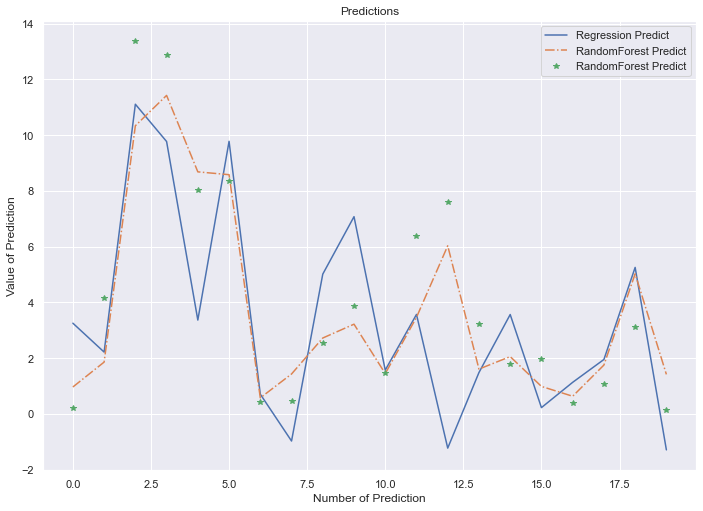

In [727]:
forestAnswer = modelForest.predict(x_test)
regAnswer = modelReg.predict(poly_transformer.transform(x_test))
import matplotlib.pyplot as plt

x = list(range(0, len(x_test)))

plt.plot(x[:20], list(regAnswer)[:20], label ='Regression Predict')
plt.plot(x[:20], list(forestAnswer)[:20], '-.', label ='RandomForest Predict')
plt.plot(x[:20], list(automlPredict)[:20], '*', label ='RandomForest Predict')
plt.xlabel("Number of Prediction")
plt.ylabel("Value of Prediction")
plt.legend()
plt.title('Predictions')
plt.show()

In [509]:
#improved RandomForrest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train.drop(['marketValue','playersId'], axis=1) , train['marketValue'])

In [ ]:
# finalDf.to_parquet('allDataForML1.parquet')

In [596]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import keras 
from keras.optimizers import RMSprop , SGD , Adam
from keras.callbacks import EarlyStopping 
from sklearn import preprocessing 
from sklearn.preprocessing import scale


In [731]:
modelDeep = Sequential() 
modelDeep.add(Dense(32, kernel_initializer = 'normal', activation = 'relu',input_shape = (23,))) 
modelDeep.add(Dense(16, activation = 'relu'))
# modelDeep.add(Dense(32, activation = 'relu'))
# modelDeep.add(Dense(128, activation = 'relu'))
# modelDeep.add(Dense(128, activation = 'relu'))
# modelDeep.add(Dense(128, activation = 'relu'))
# modelDeep.add(Dense(128, activation = 'relu'))
# modelDeep.add(Dense(64, activation = 'relu'))
# modelDeep.add(Dense(64, activation = 'relu'))



modelDeep.add(Dense(1))

In [732]:
modelDeep.compile(
   loss = 'mse', 
   optimizer = 'adam', 
   metrics = 'mean_absolute_error'
)

In [733]:
history = modelDeep.fit(
   x_train.values, y_train.values,    
   batch_size=32, 
   epochs = 500, 
   verbose = 1, 
   validation_split = 0.2, 
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 30)]
)

Epoch 1/500
145/145 [==============================] - 2s 4ms/step - loss: 38.0399 - mean_absolute_error: 2.9332 - val_loss: 36.2035 - val_mean_absolute_error: 3.2714
Epoch 2/500
145/145 [==============================] - 0s 3ms/step - loss: 27.2182 - mean_absolute_error: 2.9363 - val_loss: 27.3428 - val_mean_absolute_error: 2.9308
Epoch 3/500
145/145 [==============================] - 0s 3ms/step - loss: 23.5391 - mean_absolute_error: 2.6613 - val_loss: 24.9390 - val_mean_absolute_error: 2.7437
Epoch 4/500
145/145 [==============================] - 0s 3ms/step - loss: 21.9160 - mean_absolute_error: 2.5791 - val_loss: 23.6134 - val_mean_absolute_error: 2.7000
Epoch 5/500
145/145 [==============================] - 0s 3ms/step - loss: 21.0965 - mean_absolute_error: 2.5655 - val_loss: 22.9836 - val_mean_absolute_error: 2.6206
Epoch 6/500
145/145 [==============================] - 1s 4ms/step - loss: 20.4844 - mean_absolute_error: 2.5120 - val_loss: 22.6638 - val_mean_absolute_error: 2.551

In [734]:
score = modelDeep.evaluate(x_test.values, y_test.values, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
prediction = modelDeep.predict(x_test.values)



Test loss: 14.281351089477539
Test accuracy: 2.0005710124969482
46/46 [==============================] - 0s 2ms/step


In [735]:
prediction.tolist()
r2_score(y_test.values,prediction.tolist())


0.5518537139739823

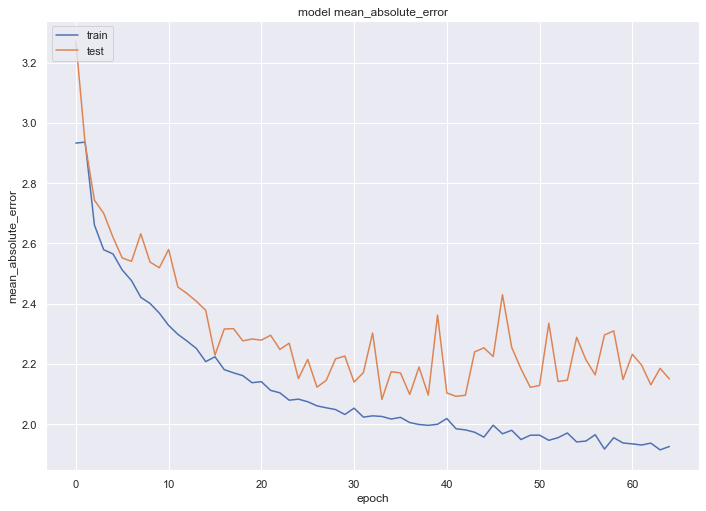

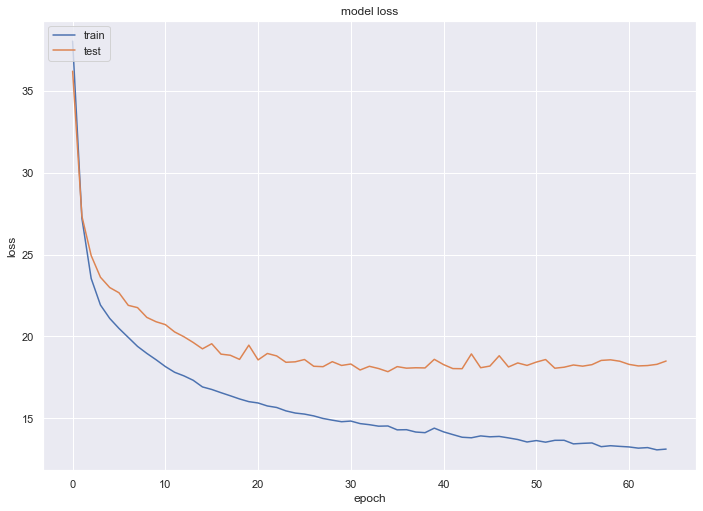

In [736]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

46/46 [==============================] - 0s 2ms/step


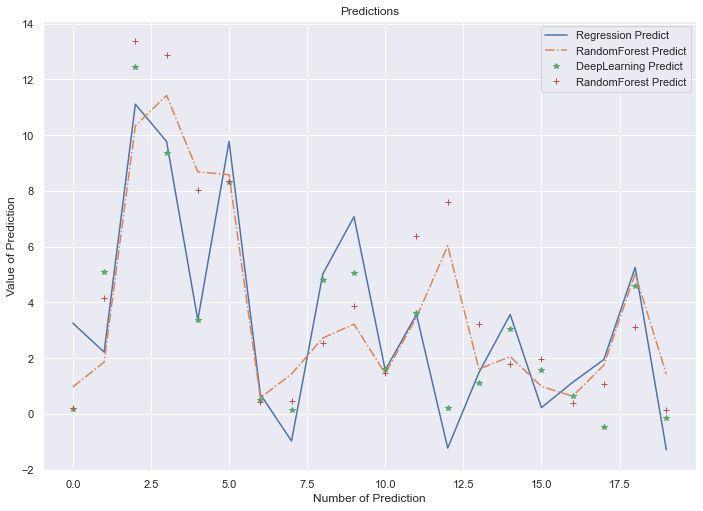

In [737]:
deepAnswer = modelDeep.predict(x_test.values) 
import matplotlib.pyplot as plt

x = list(range(0, len(x_test)))
plt.plot(x[:20], list(regAnswer)[:20], label ='Regression Predict')
plt.plot(x[:20], list(forestAnswer)[:20], '-.', label ='RandomForest Predict')
plt.plot(x[:20], list(deepAnswer)[:20], '*', label ='DeepLearning Predict')
plt.plot(x[:20], list(automlPredict)[:20], '+', label ='RandomForest Predict')


plt.xlabel("Number of Prediction")
plt.ylabel("Value of Prediction")
plt.legend()
plt.title('Predictions')
plt.show()


In [738]:
from numpy.linalg import norm
cosine = np.dot(forestAnswer,deepAnswer)/(norm(forestAnswer)*norm(deepAnswer))
print(cosine[0])

0.9303859075987112